# Exercise 3 - Pixel wise operations

**TA comment**: The visualization of the images can be done through different Python libraries, such as` matplotlib` or `skimage`. Although similar, they may have different default behaviour. In this solution, `matplotlib` is used.

Be aware that default behaviour of `matplotlib.pyplot.imshow()` is to use the dynamic range of the image values to plot the image. It is, if the image intensities range from [26, 173], the white color is assigned to 26 and the black to 173. Meanwhile, `skimage.io.imshow()` displays the dynamic range according to the image type, [0, 255] for integer images and [0., 1.] for float images.

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Explorative data analysis

### Exercise 1
Start by reading the image and inspect the histogram. Is it a bimodal histogram? Do you think it will be possible to segment it so only the bones are visible?

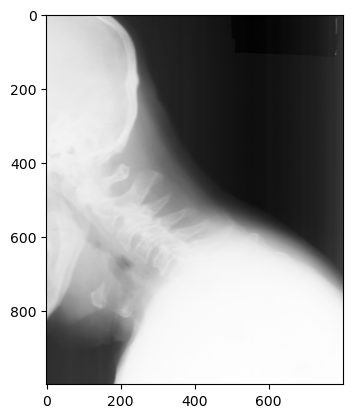

In [9]:
# Directory containing data and images

im_org = io.imread("D:/First semester/Imagenes/PRACTICAS/ImageAnalysis/exercises/ex3-PixelwiseOperations/data/vertebra.png")
plt.imshow(im_org, cmap='gray')
io.show()

Hisotograma

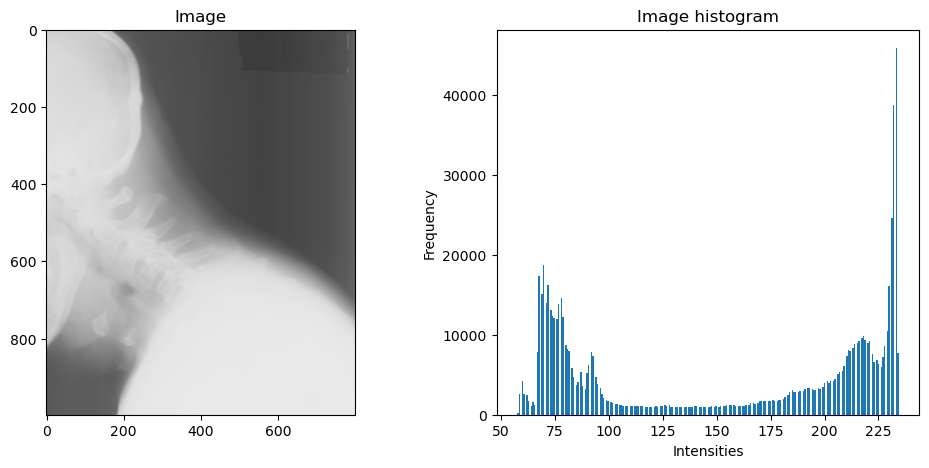

In [10]:
nbins = 256

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))

#Foto original 
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255) #aunque no hace falta en este caso en imagens de 8 bits BY W: para ponerlo más osucro todo o mas negro.
ax[0].set_title('Image')                                   # los valores mas peuqeños y más grandes que esos valores se ponene a full negro o blanco

# histograma
ax[1].hist(im_org.ravel(), bins=nbins)
ax[1].set_title('Image histogram')
ax[1].set_xlabel('Intensities')
ax[1].set_ylabel('Frequency')
plt.show()

- If the histogram has two peaks, it is likely bimodal, with one peak corresponding to the background (darker pixels) and the other peak corresponding to the bones (lighter pixels).

- If the histogram is bimodal, it's likely that segmentation is possible with a threshold. This would make the bones visible by distinguishing them from the background based on intensity. COMo es el caso, sino y no es bimodal you will nned more challenge for segmentation, like using machine learning methods.



### Exercise 2
Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [ ]:
# Para sacar minimos y maximos.

min = im_org.min()
max = im_org.max()
print(f"Min value: {min} \t Max value: {max}")

Min value: 57 	 Max value: 235


No alcanca todo el rango, por eso rentaria mas esto: By stretching the pixel values to cover the full gray-scale range, the image contrast will likely improve, making details more visible.

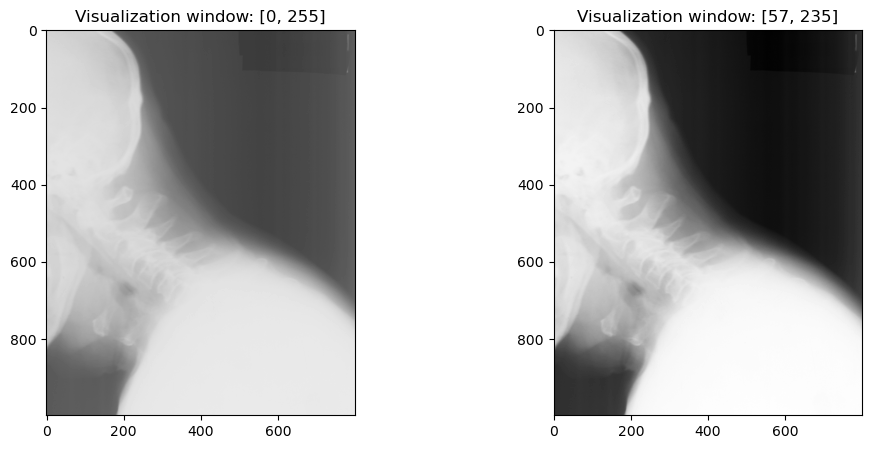

In [14]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, vmin = 0, vmax = 255, cmap = 'gray')
ax[0].set_title('Visualization window: [0, 255]')

#
ax[1].imshow(im_org, vmin = min, vmax = max, cmap = 'gray') # Here, we change the visualization window, not the image itself!
ax[1].set_title(f'Visualization window: [{min}, {max}]')
plt.show()

## Pixel type conversions

guia chula: https://scikit-image.org/docs/stable/user_guide/data_types.html
Data type

Range

uint8

0 to 255

float

-1 to 1 or 0 to 1

int8

-128 to 127


### Exercise 3 - Conversion from unsigned byte to float image

In unsigned byte images, the possible pixel value range is [0, 255]. When converting an unsigned byte image to a float image, the possible pixel value range will be [0, 1]. When you use Python skimage function img_as_float on an unsigned byte image, it will automatically divide all pixel values with 255.

In [15]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

Min value: 0.22352941176470587 	 Max value: 0.9215686274509803
The float and the original image are equivalent?: True


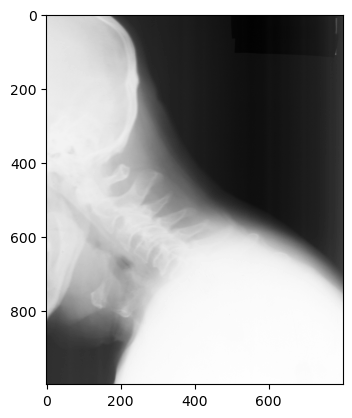

In [ ]:
im_float = img_as_float(im_org)
min = im_float.min()
max = im_float.max()
print(f"Min value: {min} \t Max value: {max}")

# si vemos los valores min y max vemos qeue antes el min era 57 y ahora es 57/255= 0.22 que es el total

# Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?
all_equal = np.allclose(im_org, im_float*255)


print(f'The float and the original image are equivalent?: {all_equal}')
plt.imshow(im_float, cmap='gray')
io.show()

Dato curioso; de unit 8(ubyte)se pasa a float por varias razones:

- cuando quieres usar esos datos y hacer filtros y todo eso se pasa porque unit es de 0 a 255 y floart permite negativos y rangos más alla de ellos

- float usa decimales, por lo que para filtros y ta es mas preciso que los enteros de unit 8

### Exercise 4 - Float to unsigned byte

Min value: 57 	 Max value: 235


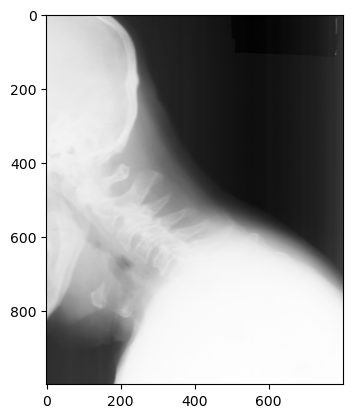

In [20]:
im_ubyte = img_as_ubyte(im_float)
# aqui es al reves, todo se multiplica por 255 pero se toma el entero por eso 
# se perdeera algo de informacion de los decimales
min, max = im_ubyte.min(), im_ubyte.max()
print(f"Min value: {min} \t Max value: {max}")
plt.imshow(im_ubyte, cmap='gray')
io.show()

## Histogram stretching

### Exercise 5
You should implement a function, that automatically stretches the histogram of an image. In other words, the function should create a new image, where the pixel values are changed so the histogram of the output image is optimal.

Here optimal means, that the minimum value is 0 and the maximum value is 255. It should be based on the linear histogram stretching equation:

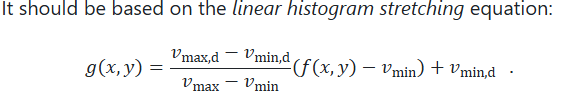

vmaxy min d son los 0 y 255 y los otros los que tiene la imagen.


In [ ]:
# El TUYO
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    # podrías hacerlo con unit, pero para calculos siempre renta más float y luego lo cambias

    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out=(((max_desired-min_desired)/(max_val-min_val))*(img_float-min_val)+min_desired)

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

In [ ]:
# El del profe
def histogram_stretch1(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = ((img_float-min_val)*(max_desired-min_desired)/(max_val-min_val))+min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

FORMAS DE COMPARAR VARIOS ARRAYS:


In [ ]:
import numpy as np

im_stretched = histogram_stretch(im_org)
im_stretched1 = histogram_stretch1(im_org)
# priemra forma :
np.array_equal(im_stretched, im_stretched1)

# segundaforma (esto es como lo dearriba pero con algo de tolerancia por si se ha ido algun decimal): 
np.allclose(im_stretched, im_stretched1, atol=1e-8)


# devuelven true si son iguales <3

True

### Exercise 6

 Test your histogram_stretch on the vertebra.png image

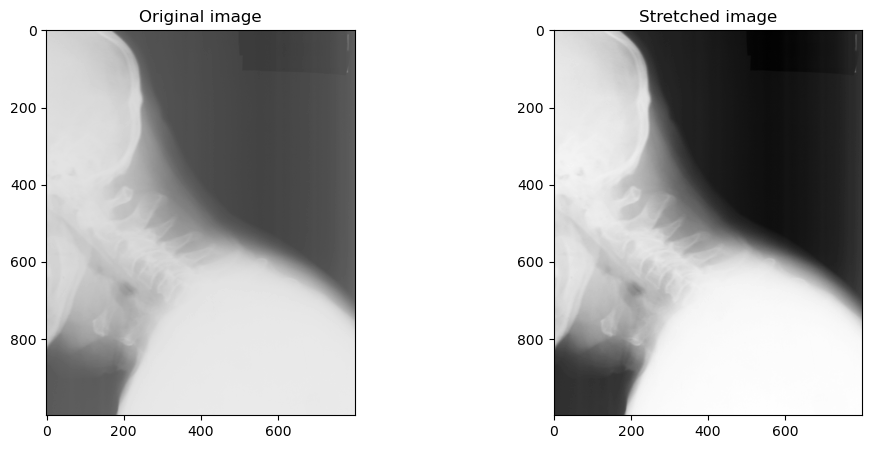

In [31]:
im_stretched = histogram_stretch1(im_org)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_stretched, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Stretched image')
plt.show()

se mejora el contraste de la imagen al redistribuir los niveles de intensidad de los píxeles. Esto hace que las diferencias entre el fondo y las estructuras relevantes sean más visibles.

## Non-linear pixel value mapping

The goal is to implement and test a function that performs a 
γ
-mapping of pixel values:

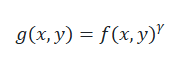

### Exercise 7
Exercise 7: Implement a function, gamma_map(img, gamma), that:

- Converts the input image to float
- Do the gamma mapping on the pixel values
- Returns the resulting image as an unsigned byte image.

In [ ]:
def gamma_map(img_in, gamma):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :param gamma: Exponent
    :return: Gamma-mapped image
    """
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)

# esto pa alterar los niveles de brillo y tal

### Exercise 8

Try different values of 
γ
, for example 0.5 and 2.0. Show the resuling image together with the input image. Can you see the differences in the images?

- gamma < 1: Aclara las sombras y puede saturar los brillos. Útil para imágenes oscuras.
- gamma > 1: Oscurece las sombras y resalta las áreas brillantes. Útil para imágenes muy claras.
- gamma = 1: La imagen no cambia.

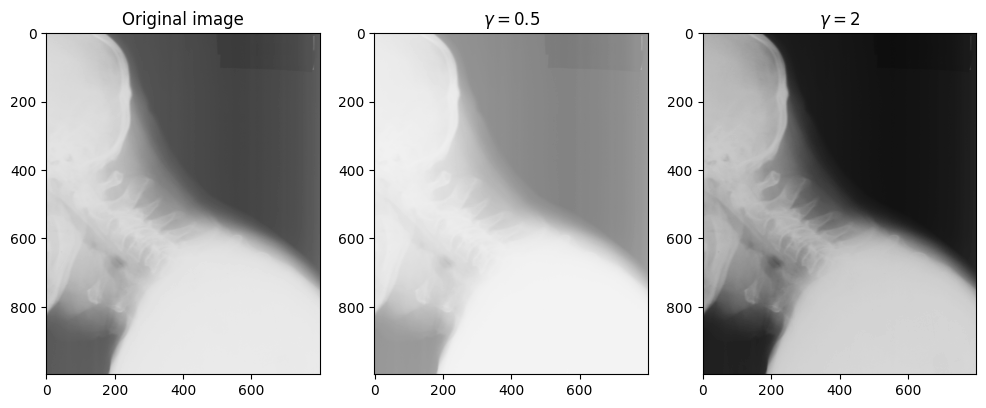

In [12]:
gamma_0_5 = gamma_map(im_org, 0.5)
gamma_2 = gamma_map(im_org, 2)

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original image')
ax[1].imshow(gamma_0_5, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title(r'$\gamma = 0.5$')
ax[2].imshow(gamma_2, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title(r'$\gamma = 2$')
plt.show()

## Image segmentation by thresholding

Now we will try to implement some functions that can seperate an image into segments. In this exercise, we aim at seperating the background from the foreground by setting a threshold in a gray scale image or several thresholds in color images.

### Exercise 9

 Implement a function, threshold_image :

In [36]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = img_in > thres
    # DATO IMPORTANTE ,la mascara está compuesta de true or false, por lo que hayq eu asarlo luego a ubyte
    # es decir solo da 1 o 0 si es mayor o no
    # print(mask) todo true y false

    #print(im_thres) esto da todos los que antes eran 1 a 255
    return img_as_ubyte(mask)

### Exercise 10
Test your threshold_image function on the vertebra image with different thresholds. 
S/ cuanto más treshold, más se acercara a separar de forma correcta (ya que tomara los valores mas cerca del 255 solo (blanco)), pero si pones mucho perderas cosas grises qeu sonn huesos tmb.

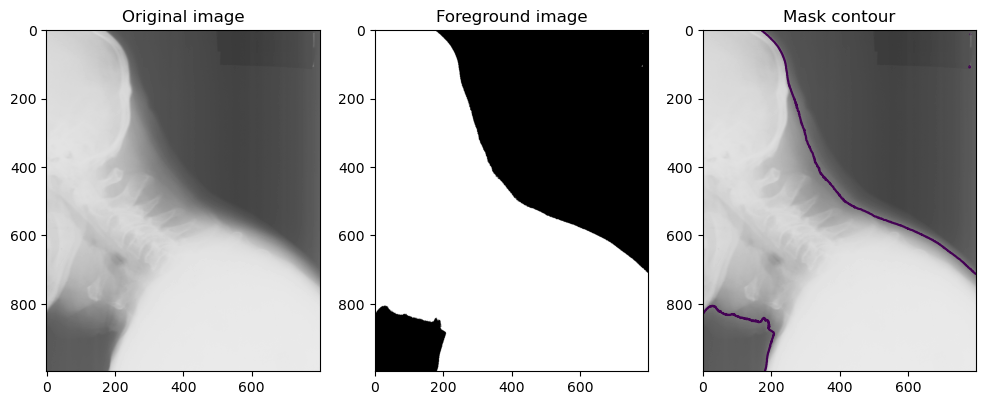

In [45]:
im_thres = threshold_image(im_org, thres = 120)
#print(im_thres) esto da todos los que antes eran 1 a 255
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Foreground image')
ax[2].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
# para hacer un controno alrededor de la mascara, el rango ese ponlo siempre,
#  es como poner 255 pero est metodo necesita eso.
ax[2].contour(im_thres, [254, 256])
ax[2].set_title('Mask contour')
plt.show()

# Automatic thresholds using Otsu's method


An optimal threshold can be estimated using Otsu's method. This method finds the threshold, that minimizes the combined variance of the foreground and background.

### Exercise 11

Otsu's method and use it to compute and apply a threshold to the vertebra image.

Valor del umbral idoneo:  148


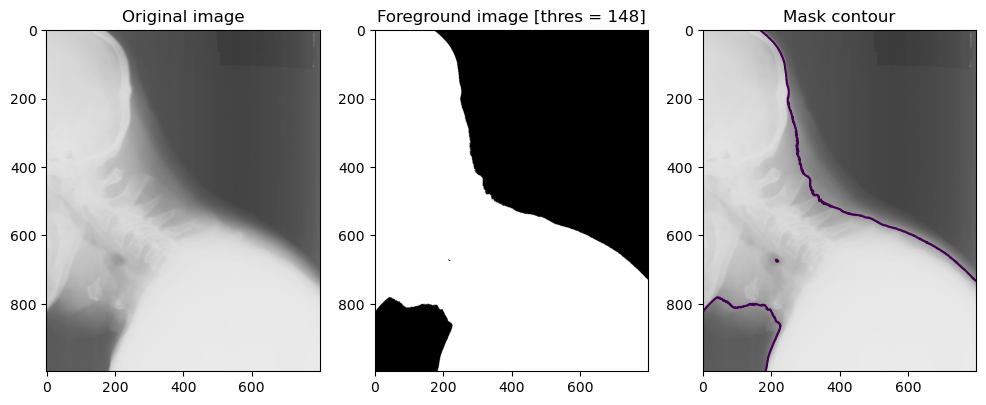

In [61]:
from skimage.filters import threshold_otsu

# con el metodo de otsu

# esto devuelve el trshoold solo que sera idoneo
thres_new = threshold_otsu(im_org)
print('Valor del umbral idoneo: ', thres_new)

# forma 1 de aplicar threshold(más limpio)
im_thres = threshold_image(im_org, thres = thres_new)

'''# forma 2 más og.
im_thres1= im_org>thres_new
im_thres=img_as_ubyte(im_thres1)
'''


fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title(f'Foreground image [thres = {thres_new}]')
ax[2].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].contour(im_thres, [254, 256])
ax[2].set_title('Mask contour')
plt.show()

### Exercise 12
Try to take a picture on a dark background. Convert the image to grayscale and try to find a threshold that creates a silhouette image (an image where the head is all white and the background black).

uint8
uint8


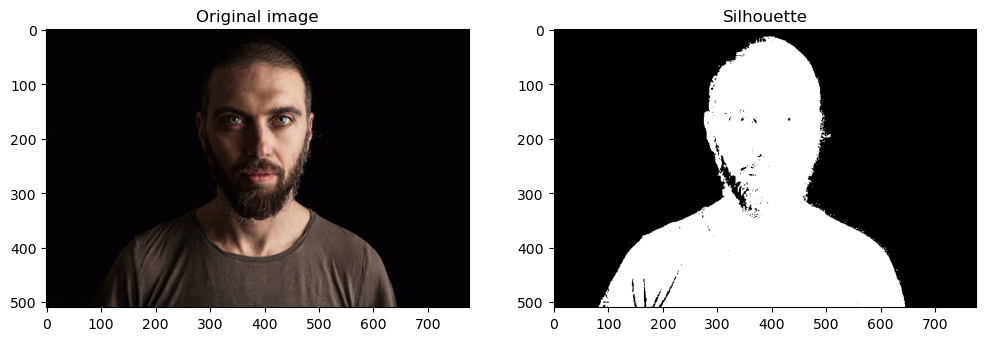

In [98]:
from skimage.color import rgb2gray


im_name = "/dark_background.png"
im_org = io.imread(r'D:\First semester\Imagenes\PRACTICAS\ImageAnalysis\exercises\ex3-PixelwiseOperations\data\dark_background.png')

# para saber el tipo de la imagen
print(im_org.dtype)
# ESTO ES IMPORTANTE porque rgb2 te da laimagen en blanco y negro pero EN FLOAT, por eso hace lo de unit8
im_gray = img_as_ubyte(rgb2gray(im_org))
print(im_gray.dtype)

# aqui ha puesto el 5 el jambo, pero se podría hacer un Otsu y ver cuaal es más idoneo
thres = 5
im_thres = threshold_image(im_gray, thres = thres)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title(f'Silhouette')
plt.show()

## Color thresholding in the RGB color space

### Exercise 13

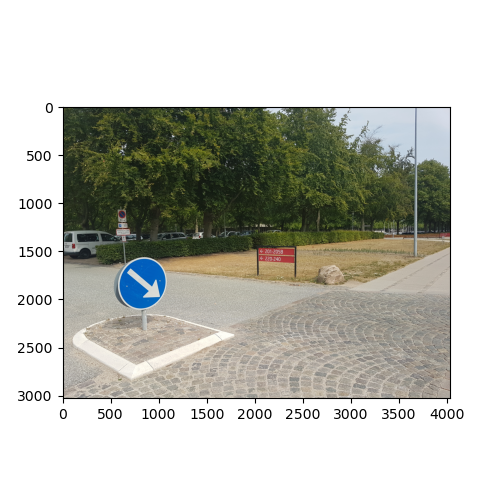

In [ ]:
# Change the backend to be able to explore the pixel intensities
# For VSCode Notebooks and JupyterNotebook "%matplotlib widget"
# For Spyder "%matplotlib auto"


# esto se pone para ver en que pixel hay caa cosa y tal puede ser interesante.
%matplotlib widget 
im_org = io.imread(r'D:\First semester\Imagenes\PRACTICAS\ImageAnalysis\exercises\ex3-PixelwiseOperations\data\DTUSigns2.jpg')

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
ax.imshow(im_org)
plt.show()

In [ ]:
def detect_dtu_signs(img_in, sign):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)

    

### Exercise 14

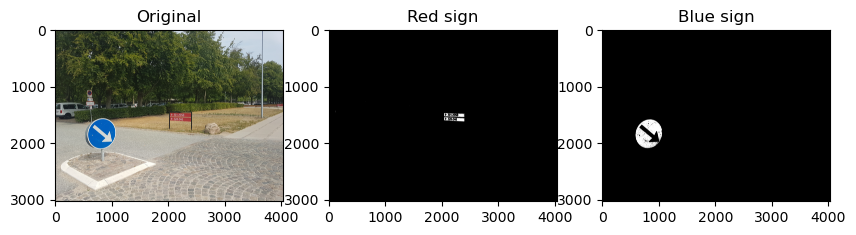

In [8]:
%matplotlib inline 
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

def detect_dtu_signs(img_in, sign):
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]
# toma Para los píxeles en la imagen:
    #El valor rojo debe ser muy bajo (menor que 10).
    #El valor verde debe estar entre 85 y 105.
    #El valor azul debe estar entre 180 y 200.
    if sign == 'red':
        segm = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)
    if sign == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                    (b_comp > 180) & (b_comp < 200)

    return img_as_ubyte(segm)

img_red = detect_dtu_signs(im_org, 'red')
img_blue = detect_dtu_signs(im_org, 'blue')

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))
ax[0].imshow(im_org)
ax[0].set_title('Original')
ax[1].imshow(img_red, vmin = 0, vmax = 255, cmap = 'gray')
ax[1].set_title('Red sign')
ax[2].imshow(img_blue, vmin = 0, vmax = 255, cmap = 'gray')
ax[2].set_title('Blue sign')
plt.show()

## Color thresholding in the HSV color space

### Exercise 15
 

In [10]:
from skimage import color

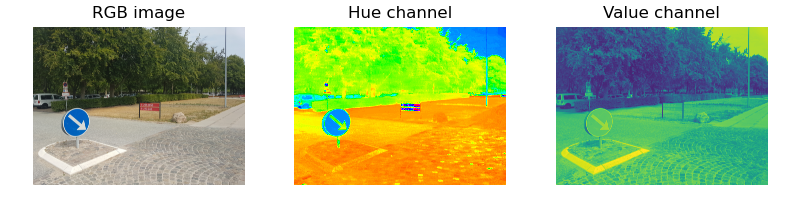

In [11]:
%matplotlib widget 

hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

Now make a sign segmentation function using tresholding in HSV space and locate both the blue and the red sign.

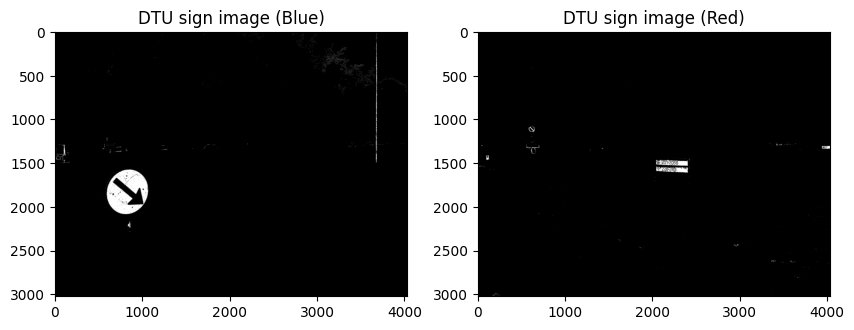

In [23]:
%matplotlib inline 

segm_blue = (hue_img < 0.6) & (hue_img  > 0.4) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img  > 0.9)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title('DTU sign image (Blue)')

ax2.imshow(segm_red, cmap = 'gray')
ax2.set_title('DTU sign image (Red)')
plt.show()

## Real time pixel-wise operations on videos

Press `q` to exit the scripts from exercises 16-18.

### Exercise 16

In [14]:
!python Ex3-VideoPixelWiseOperations.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


### Exercise 17

In [15]:
!python Ex3-Ex17.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


### Exercise 18

In [17]:
!python Ex3-Ex18.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
